Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

# Initialise & Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

DATADIR = "D:\OneDrive\Documents\Studies Information\PIAIC\Batch 34_2\Python Code\Deep Learning\Assignments\\flowers"
CATEGORIES = ["daisy", "dandelion", "rose", "sunflower", "tulip"]
IMG_SIZE = 180 #256 #150


# Sampling

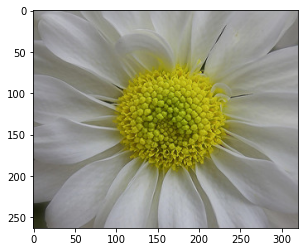

In [64]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #making path to folder
    for img in os.listdir(path):
        #img_array1 = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #get full image path & make it GRAY
        #plt.imshow(img_array1, cmap="gray")
        
        img_array1 = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR) #get full image path & make it GRAY
        plt.imshow(cv2.cvtColor(img_array1, cv2.COLOR_BGR2RGB))
       
        plt.show()
        break
    break
    

In [127]:
img_array1.shape

(263, 320, 3)

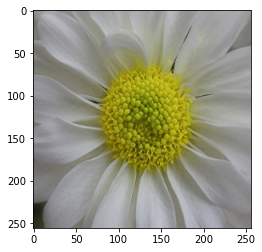

In [568]:
#img_array2 = cv2.resize(img_array1, (150, 150))
#plt.imshow(img_array2, cmap="gray")

img_array2 = cv2.resize(img_array1, (256, 256))
plt.imshow(cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB))


plt.show()

# Load Data

In [2]:
full_ds = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #making path to folder
        label_img = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                #raw_img = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #get full image path & make it GRAY
                raw_img = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR) #get full image path & make it COLOR
                resized_img = cv2.resize(raw_img, (IMG_SIZE, IMG_SIZE))
                full_ds.append([resized_img, label_img])
            except Exception as e:
                print("Corupted Images: ",os.path.join(DATADIR,category,img))
                
            
        
create_training_data()     


Corupted Images:  D:\OneDrive\Documents\Studies Information\PIAIC\Batch 34_2\Python Code\Deep Learning\Assignments\flowers\dandelion\flickr.py
Corupted Images:  D:\OneDrive\Documents\Studies Information\PIAIC\Batch 34_2\Python Code\Deep Learning\Assignments\flowers\dandelion\flickr.pyc
Corupted Images:  D:\OneDrive\Documents\Studies Information\PIAIC\Batch 34_2\Python Code\Deep Learning\Assignments\flowers\dandelion\run_me.py


# Preprocessing Data

In [3]:
np.random.shuffle(full_ds) #Shuffle data

In [4]:
#Data preprocessing for feeding into the model¶
x = []
y = []

for features, labels in full_ds:
    x.append(features)
    y.append(labels)
    
#x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)      # 1 is for Grey image
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 3)      # 3 is for color image

In [5]:
#Split Data (60 train + 40 test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)

#Split Data (80 train + 20 Val)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42) 

In [6]:
print('Train Data:')
print('Data: {} -- Label: {}'.format(len(x_train),len(y_train)))
print('Sample Data: {} -- Sample Label: {}'.format(x_train[0], y_train[0]))

print(' ')
print('Val Data:')
print('Data: {} -- Label: {}'.format(len(x_val),len(y_val)))
print('Val Data: {} -- Val Label: {}'.format(x_val[0], y_val[0]))

print(' ')
print('Test Data:')
print('Data: {} -- Label: {}'.format(len(x_test),len(y_test)))
print('Sample Data: {} -- Sample Label: {}'.format(x_test[0], y_test[0]))

Train Data:
Data: 2074 -- Label: 2074
Sample Data: [[[ 53  82  81]
  [ 38  71  60]
  [ 15  53  35]
  ...
  [ 73 100  89]
  [ 59  85  71]
  [ 23  52  34]]

 [[ 45  76  74]
  [ 48  83  72]
  [ 38  75  59]
  ...
  [ 43  70  59]
  [ 46  74  59]
  [ 29  60  42]]

 [[ 53  88  84]
  [ 45  83  72]
  [ 31  70  55]
  ...
  [ 30  56  43]
  [ 24  51  36]
  [ 23  57  40]]

 ...

 [[  5  50  31]
  [ 14  36  27]
  [ 35  67  60]
  ...
  [ 41  86  63]
  [ 27  67  57]
  [ 29  72  53]]

 [[  1  46  26]
  [ 11  37  28]
  [ 16  48  40]
  ...
  [ 19  69  43]
  [  9  51  38]
  [  6  51  29]]

 [[  1  45  25]
  [ 13  43  33]
  [ 12  46  36]
  ...
  [ 10  61  34]
  [  7  47  33]
  [ 27  70  48]]] -- Sample Label: 0
 
Val Data:
Data: 519 -- Label: 519
Val Data: [[[ 43  49  59]
  [ 48  58  62]
  [ 51  63  65]
  ...
  [154 169 136]
  [157 169 140]
  [171 178 153]]

 [[ 40  50  59]
  [ 41  53  56]
  [ 46  57  61]
  ...
  [172 183 153]
  [183 191 166]
  [195 199 178]]

 [[ 40  53  60]
  [ 39  53  55]
  [ 45  57  61

In [7]:
# One-Hot Encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)


In [8]:
print('Train Data:')
print('Data: {} -- Label: {}'.format(len(x_train),len(y_train)))
print('Sample Data: {} -- Sample Label: {}'.format(x_train[0], y_train[0]))

Train Data:
Data: 2074 -- Label: 2074
Sample Data: [[[ 53  82  81]
  [ 38  71  60]
  [ 15  53  35]
  ...
  [ 73 100  89]
  [ 59  85  71]
  [ 23  52  34]]

 [[ 45  76  74]
  [ 48  83  72]
  [ 38  75  59]
  ...
  [ 43  70  59]
  [ 46  74  59]
  [ 29  60  42]]

 [[ 53  88  84]
  [ 45  83  72]
  [ 31  70  55]
  ...
  [ 30  56  43]
  [ 24  51  36]
  [ 23  57  40]]

 ...

 [[  5  50  31]
  [ 14  36  27]
  [ 35  67  60]
  ...
  [ 41  86  63]
  [ 27  67  57]
  [ 29  72  53]]

 [[  1  46  26]
  [ 11  37  28]
  [ 16  48  40]
  ...
  [ 19  69  43]
  [  9  51  38]
  [  6  51  29]]

 [[  1  45  25]
  [ 13  43  33]
  [ 12  46  36]
  ...
  [ 10  61  34]
  [  7  47  33]
  [ 27  70  48]]] -- Sample Label: [1. 0. 0. 0. 0.]


In [9]:
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_val = scaler.fit_transform(x_val)
#x_test = scaler.fit_transform(x_test)

x_train = x_train/255
x_val = x_val/255
x_test = x_test/255


print('Train Data:')
print('Data: {} -- Label: {}'.format(len(x_train),len(y_train)))
print('Sample Data: {} -- Sample Label: {}'.format(x_train[0], y_train[0]))

Train Data:
Data: 2074 -- Label: 2074
Sample Data: [[[0.20784314 0.32156863 0.31764706]
  [0.14901961 0.27843137 0.23529412]
  [0.05882353 0.20784314 0.1372549 ]
  ...
  [0.28627451 0.39215686 0.34901961]
  [0.23137255 0.33333333 0.27843137]
  [0.09019608 0.20392157 0.13333333]]

 [[0.17647059 0.29803922 0.29019608]
  [0.18823529 0.3254902  0.28235294]
  [0.14901961 0.29411765 0.23137255]
  ...
  [0.16862745 0.2745098  0.23137255]
  [0.18039216 0.29019608 0.23137255]
  [0.11372549 0.23529412 0.16470588]]

 [[0.20784314 0.34509804 0.32941176]
  [0.17647059 0.3254902  0.28235294]
  [0.12156863 0.2745098  0.21568627]
  ...
  [0.11764706 0.21960784 0.16862745]
  [0.09411765 0.2        0.14117647]
  [0.09019608 0.22352941 0.15686275]]

 ...

 [[0.01960784 0.19607843 0.12156863]
  [0.05490196 0.14117647 0.10588235]
  [0.1372549  0.2627451  0.23529412]
  ...
  [0.16078431 0.3372549  0.24705882]
  [0.10588235 0.2627451  0.22352941]
  [0.11372549 0.28235294 0.20784314]]

 [[0.00392157 0.1803921

# Create Model

In [157]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

Network = models.Sequential()
#Network.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
Network.add(layers.Conv2D(8, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(IMG_SIZE, IMG_SIZE, 3))) # for color
Network.add(layers.MaxPooling2D((2, 2)))
#Network.add(layers.Dropout(0.5))
Network.add(layers.Conv2D(8, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
Network.add(layers.MaxPooling2D((2, 2)))
#Network.add(layers.Dropout(0.5))
Network.add(layers.Conv2D(8, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01),))
Network.add(layers.MaxPooling2D((2, 2)))
#Network.add(layers.Dropout(0.5))
Network.add(layers.Flatten())
Network.add(layers.Dropout(0.5))
Network.add(layers.Dense(8, activation='relu'))
Network.add(layers.Dense(5, activation='softmax'))

# Compilation
Network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [158]:
Network.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 178, 178, 8)       224       
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 89, 89, 8)         0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 87, 87, 8)         584       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 43, 43, 8)         0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 41, 41, 8)         584       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 20, 20, 8)         0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 3200)            

In [159]:
from tensorflow.keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True, verbose = 1)

In [160]:
#Train Model
#history = Network.fit(train_data, train_label, epochs=100, batch_size=50, validation_data=(val_data, val_label), callbacks =[earlystopping])
history = Network.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_val, y_val), callbacks =[earlystopping])

Train on 2074 samples, validate on 519 samples
Epoch 1/25
2074/2074 [==============================] - 18s 9ms/sample - loss: 1.7021 - accuracy: 0.2907 - val_loss: 1.5436 - val_accuracy: 0.3237
Epoch 2/25
2074/2074 [==============================] - 20s 10ms/sample - loss: 1.4207 - accuracy: 0.3954 - val_loss: 1.2904 - val_accuracy: 0.5337
Epoch 3/25
2074/2074 [==============================] - 21s 10ms/sample - loss: 1.2555 - accuracy: 0.5111 - val_loss: 1.2284 - val_accuracy: 0.5395
Epoch 4/25
2074/2074 [==============================] - 21s 10ms/sample - loss: 1.2132 - accuracy: 0.5405 - val_loss: 1.1835 - val_accuracy: 0.5568
Epoch 5/25
2074/2074 [==============================] - 21s 10ms/sample - loss: 1.1544 - accuracy: 0.5627 - val_loss: 1.1988 - val_accuracy: 0.5434
Epoch 6/25
2074/2074 [==============================] - 21s 10ms/sample - loss: 1.1395 - accuracy: 0.5834 - val_loss: 1.1664 - val_accuracy: 0.5645
Epoch 7/25
2074/2074 [==============================] - 21s 10ms/s

# Plotting the training and validation loss

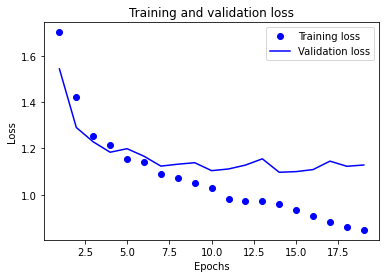

In [161]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting the training and validation accuracy


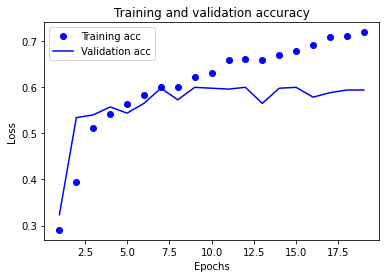

In [162]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate Model

In [163]:
#Check Model performance of Train Data
train_loss,train_acc=Network.evaluate(x_train, y_train)
print("Accuracy: ",train_acc,"\nTrain Loss Value:",train_loss)
#test_labels[15]

2074/2074 [==============================] - 7s 3ms/sample - loss: 0.8518 - accuracy: 0.7175
Accuracy:  0.7174542 
Train Loss Value: 0.8517785822988821


In [164]:
#Check Model performance of Test Data
test_loss,test_acc=Network.evaluate(x_test, y_test)
print("Accuracy: ",test_acc,"\nTest Loss Value:",test_loss)

1730/1730 [==============================] - 6s 3ms/sample - loss: 1.1076 - accuracy: 0.6092
Accuracy:  0.6092486 
Test Loss Value: 1.1076104277131185


# Prediction

In [79]:
predictions = Network.predict_classes(test_data)
# show the inputs and predicted outputs
for i in range(10):
    print("Predicted Value: {} -- Original Value: {}"
          .format(CATEGORIES[predictions[i]], CATEGORIES[np.argmax(test_label[i])]))

Predicted Value: tulip -- Original Value: daisy
Predicted Value: tulip -- Original Value: daisy
Predicted Value: dandelion -- Original Value: dandelion
Predicted Value: dandelion -- Original Value: sunflower
Predicted Value: dandelion -- Original Value: dandelion
Predicted Value: dandelion -- Original Value: daisy
Predicted Value: tulip -- Original Value: tulip
Predicted Value: dandelion -- Original Value: sunflower
Predicted Value: dandelion -- Original Value: rose
Predicted Value: daisy -- Original Value: daisy


ValueError: cannot reshape array of size 19 into shape (3,3,1)